In [12]:
import datetime
from datetime import date
from datetime import datetime
import requests
import pprint
from bs4 import BeautifulSoup
import pandas as pd
import re
import pickle
from urllib.request import urlopen
import glob
# import altair as alt
import time
import itertools
import numpy as np
import operator
from datetime import timedelta
from ipywidgets import interact, IntSlider
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 5000
# pd.options.display.max_rows = 5000

In [13]:
# Load Dataset

# Renzo's Path
dataset = pd.read_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/dataset_for_model_final.csv')

# Sravan's Path
# dataset = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/complete_final_df_5.csv')


# dataset = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/complete_final_df_5.csv')

# dataset = pd.read_csv('G:/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/complete_final_df_5.csv')


In [14]:
dataset.loc[(dataset['injury_count'].shift(1) == 1) & (dataset['injury_count'] == 1), 'drop'] = 1
dataset.loc[(dataset['injury_count'].shift(1) == 0) & (dataset['injury_count'] == 1), 'drop'] = 0
dataset.loc[(dataset['injury_count'].shift(1) == 1) & (dataset['injury_count'] == 0), 'drop'] = 0
dataset.loc[(dataset['injury_count'].shift(1) == 0) & (dataset['injury_count'] == 0), 'drop'] = 0
dataset.loc[(dataset['injury_count'] == 1) & (dataset['cum_week'] == 0), 'drop'] = 1

dataset.colu

/Users/renzomaldonado/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


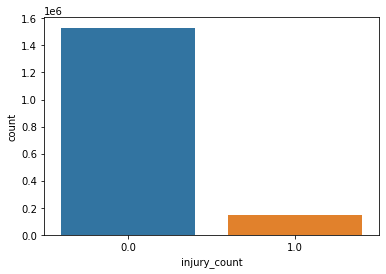

In [15]:
sns.countplot(dataset['injury_count'])
plt.savefig('images/image7.png')

In [16]:
dataset.columns

Index(['name', 'FBRefID', 'date', 'agg_week', 'agg_year', 'Injury',
       'injury_week', 'injury_year', 'Min', 'Gls',
       ...
       'Crs_cum', 'TklW_cum', 'OG_cum', 'PKwon_cum', 'PKcon_cum', 'Won_cum',
       'Loss_cum', 'Draw_cum', 'was_match_cum', 'drop'],
      dtype='object', length=124)

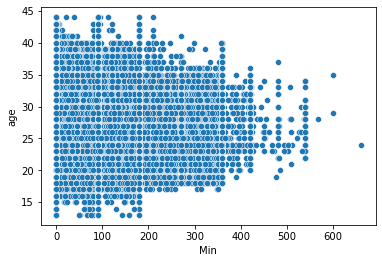

In [17]:
sns.scatterplot(data=dataset, x='Min', y='age')
plt.savefig('images/image8.png')

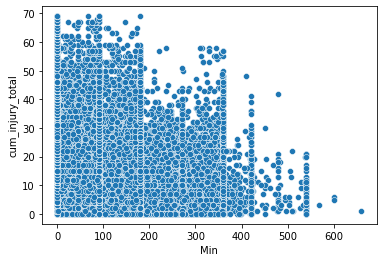

In [18]:
sns.scatterplot(data=dataset, x='Min', y='cum_injury_total')
plt.savefig('images/image9.png')

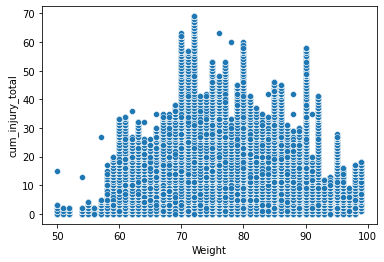

In [19]:
sns.scatterplot(data=dataset, x='Weight', y='cum_injury_total')
plt.savefig('images/image10.png')

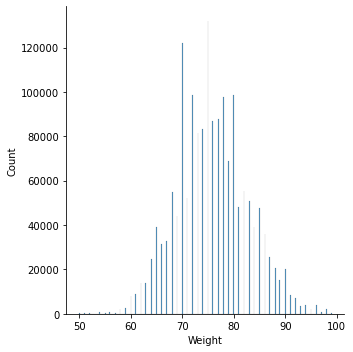

In [20]:
sns.displot(dataset['Weight'])
plt.savefig('images/image11.png')

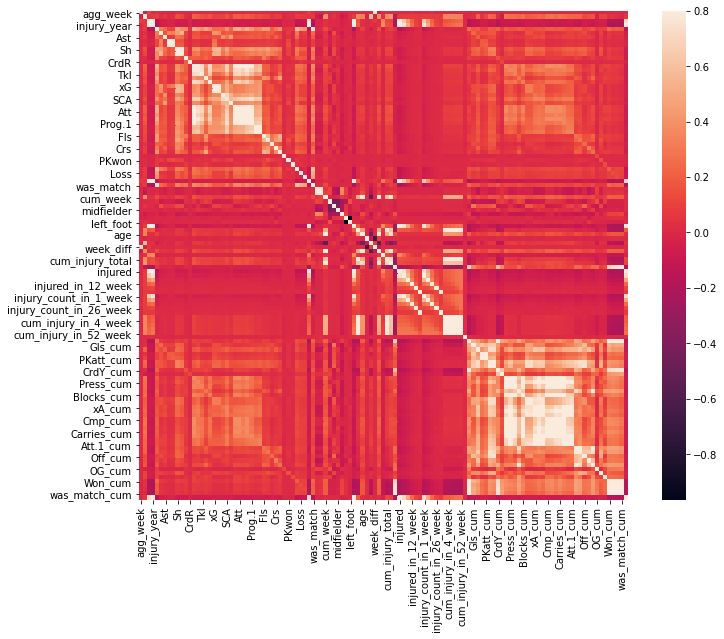

In [21]:
#correlation matrix
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.savefig('images/image11.png')

/Users/renzomaldonado/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


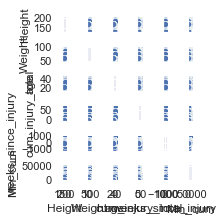

<Figure size 432x288 with 0 Axes>

In [30]:
sns.set()
cols = ['Height', 'Weight', 'age','cum_injury_total', 'weeks_since_injury', 'Min_cum']
sns.pairplot(dataset[cols],size=.5)
plt.show()
plt.savefig('images/image12.png')